In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data processing

## Load

In [50]:
df = pd.read_excel("raw-data.xlsx")
df.head()

,provider,text_url,text,names_url,names
0,Artificial Grass GB,https://www.artificialgrassgb.co.uk/,\nWhy choose artificial grass over real grass?...,https://www.artificialgrassgb.co.uk/,"Velvet, English Garden, Cadiz, Gold, Forest, L..."
1,Grass Direct,NaN,NaN,https://www.grass-direct.co.uk/artificial-grass,"Oasis, Sydney, Bordeaux, Antigua, Geneva, Melb..."
2,Express grass,NaN,NaN,https://expressgrass.com/artificial-grass.html,"Woodstock, Classic, Hartfield, Chartwell, Oakh..."
3,Easigrass,https://www.easigrass.com/areas-we-cover/londo...,"No Mud, No Mess, No Mowing.\n\nArtificial Gras...",https://www.easigrass.com/easi-grass-products/...,"Mayfair, Belgravia, Chelsea, Kensington, Holla..."
4,Nustone,https://nustone.co.uk/product-category/artific...,Artificial Grass will transform your garden an...,https://nustone.co.uk/product-category/artific...,"Tahoe, Cleveland, Santa Fe, Nebraska, Ozark"


## Names

## Text
We need to clean the text data in the title so that we can do some proper text mining. This includes

- Standardising
- Tokenising and removing stop words
- Lemmatising


### Standardising

We will remove punctuation and clean any other symbols/words as needed.


In [134]:
# make text lower case
text = df["text"].str.lower()

# replace values within titles

# function to loop through the column and replace substrings
def replace_values(text, dic):
    for x, y in dic.items():
        text = text.str.replace(x, y, regex=True)
    return text

# list of values to be replaced, including punctuation
replace_dict = {"&amp;": " ", #xml syntax for &
                "\n":" ",
                "[!\"#$%&()*+,./:;<=>?@[\]^_`{|}~“”-]": " ",
                "  ": " ", #double space
                "’s" :"",  
                "low maintenance" :"lowmaintenance",  
                "’m" : "",
                "y'all": "you all",
                "i'm": "i am",
                "i've": "i have",
                "it'll": "it will",
                "we're": "we are",
                "i'd": "i would",
                "mean":"",
                "would":"",
                "gardens":"garden"
               }
                
# apply function
text = replace_values(text, replace_dict)

# strip white space at the end
text = text.str.strip()

# add new column to dataframe
df["text_standardised"] = text

print(text)

0     why choose artificial grass over real grass un...
1                                                   NaN
2                                                   NaN
3     no mud no mess no mowing  artificial grass in ...
4     artificial grass will transform your garden an...
5     professional artificial turf installation in l...
6     no more muddy feet get the perfect artificial ...
7                                                   NaN
8     artificial grass is great for people in london...
9                                                   NaN
10    looks great it looks luscious and full of life...
11    lush green grass all year round fake grass loo...
12    if you love grass but don’t want the mess mud ...
13    make the most of your garden with trulawn lowm...
14    all year round play area no more mud  artifici...
15    pet and child friendly artificial grass ur art...
16    say hello to our green grass the artificial gr...
17    struggling to maintain your lawn looking p

### Remove stop words

We now remove stop words that don't really help to identify the sentiment or topic of a sentence.

In [122]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lisa.hornung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [135]:
# create empty list to store text without stop words
text_no_stop_words = []

# iterate through each word in each text row and append those that are no stop words
# split titles into substrings using space as delimiter
for words in text.str.split(" "):
    x = []
    try:
        for word in words:
            if word not in stop_words:
                x.append(word)
    
    #exception for missing data
    except TypeError:
        x.append(" ")
    text_no_stop_words.append(x)

# join titles back together
text_no_stop_words = [" ".join(items) for items in text_no_stop_words]

# add title to dataframe
df["text_no_stop_words"] = text_no_stop_words

print(text_no_stop_words[:3])

["choose artificial grass real grass unlike real grass artificial grass give perfect looking lawn year round usable lawn year round there's mowing mud bald patches weeds waterlogged soggy lawns giving even time enjoy garden artificial grass installed artificial grass installed literally anywhere standard garden installations including decking flagstones block paving concrete tarmac areas balconies terraces schools nurseries artificial grass great commercial use creating big statement business said using artificial grass events whether public private safe children yes perfect choice create safe play area children year round supply softness grass available high level bounce back help keep children safe matter play activities suitable pets yes grass pet friendly fact many kennels use artificial grass colour grass affected pet mess mess easily removed residue easily rinsed away tough stains soap detergent used followed hosing artificial grass require maintenance lowmaintenance product clea

### Lemmatize

Now we want to reduce the inflectional forms of each word into a common base or root. We do this by using a lemmatiser that detects the lemma for each word.

Read [this article](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/) for more information on the difference betweent stemmatising and lemmatising.

You will need to install spacy and download the en_core_web_sm package. Explanation [here](https://spacy.io/usage).


In [136]:
import en_core_web_sm

# load model from SpaCy
nlp = en_core_web_sm.load()

# create new list to store lemmatised titles
text_lemmatised = []

# iterate through each word in each title and append the lemmatised version of the word
for words in pd.Series(text_no_stop_words):
    x = []
    for word in nlp(words):
        x.append(word.lemma_)
    text_lemmatised.append(x)

# join titles back together
text_lemmatised = [" ".join(items) for items in text_lemmatised]

df["text_lemmatised"] = text_lemmatised

In [81]:
df.to_csv("data-clean.csv", index=False)

# Analysis

- [How To Perform Sentiment Analysis in Python 3 Using the Natural Language Toolkit (NLTK)](https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk)
- [Sentiment Analysis on Reddit News Headlines with Python’s Natural Language Toolkit (NLTK)](https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/)

## Word frequency in text

In [149]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lisa.hornung\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [540]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def process_text(text):
    tokens = []
    lines = []
    for line in text:
        toks = tokenizer.tokenize(line)
        
        #return only those words that are nouns, adjectives or verbs
        types = nltk.pos_tag(toks)
        toks_filtered = [i[0] for i in types if i[1] in ['NN', 'JJ', 'RB']]
        
        #check against stop words again
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        toks = [t for t in toks if t in toks_filtered]
        tokens.extend(toks)
        lines.append(toks)

    return tokens, lines

In [541]:
text_tokens, line_tokens = process_text(df["text_lemmatised"])
df["tokens"] = line_tokens

word_freq = nltk.FreqDist(text_tokens)
word_freq = word_freq.most_common()
word_freq = pd.DataFrame(word_freq, columns=["Word", "Count"])

In [542]:
## add provider count

provider = []
for word in word_freq["Word"]:
    counter = 0
    for i in range(len(df)):
        if word in df["tokens"].iloc[i]:
            counter+=1
    provider.append(counter)

word_freq["Provider_count"] = provider

#export output
word_freq.to_csv("word_frequency.csv", index=False)

### Clean data for histogram

In [533]:
#filter for minimum 5 mentions and 3 providers
histo = word_freq[(word_freq["Count"]>4) & (word_freq["Provider_count"]>2)]

In [532]:
#explore distribution to decide on bins
#plt.hist(word_histo["Count"].iloc[2:], bins =[2, 5, 8, 11,14,17,21,24,27,30] , log=False)

In [534]:
#create column based on binned values and add labels
_bins = [2, 5, 8, 11,14,17,21,24,27,30, 55]
labels = ["5"] + [str(i+1)+"-"+str(i+3) for i in _bins[1:-2]] + [">30"]

histo['binned'] = pd.cut(histo['Count'], bins=_bins, labels=labels)

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_32640\4149241285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  histo['binned'] = pd.cut(histo['Count'], bins=_bins, labels=labels)


In [535]:
histo["Word"] = histo["Word"].str.replace("lowmaintenance", "low-maintenance")

#exclude more 'irrelevant' words
exclude = ["use", "give", "one", "feel", "want", "create", "help", "london", "also", "many", "create", "print", "give"]
histo = histo[~histo["Word"].isin(exclude)]

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_32640\3256076667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  histo["Word"] = histo["Word"].str.replace("lowmaintenance", "low-maintenance")


In [536]:
histo = histo[~histo["binned"].isna()]
histo = histo.sort_values(by=["binned", "Provider_count"], ascending=[True, False]).reset_index(drop=True)

In [537]:
histo

,Word,Count,Provider_count,binned
0,choice,5,5,5
1,available,5,5,5
2,suitable,5,5,5
3,money,5,5,5
4,new,5,5,5
...,...,...,...,...
82,time,26,12,25-27
83,child,30,15,28-30
84,year,39,20,>30
85,pet,50,19,>30


### Graph

In [427]:
#colour palette
import matplotlib as mpl
import matplotlib.cm as cm
from palettable.cmocean.sequential import Deep_8, Dense_10, Haline_10_r, Matter_8

#cmap = Haline_10_r.mpl_colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list(colors=Haline_10_r.mpl_colors[3:], name='Hailine_10r_cut')
norm = mpl.colors.Normalize(vmin=3, vmax=word_histo["Provider_count"].max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

In [429]:
#fonts
from matplotlib import font_manager

#font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Inter-Bold.otf')
subtitle_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Inter-SemiBold.otf')
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Inter-Medium.otf')

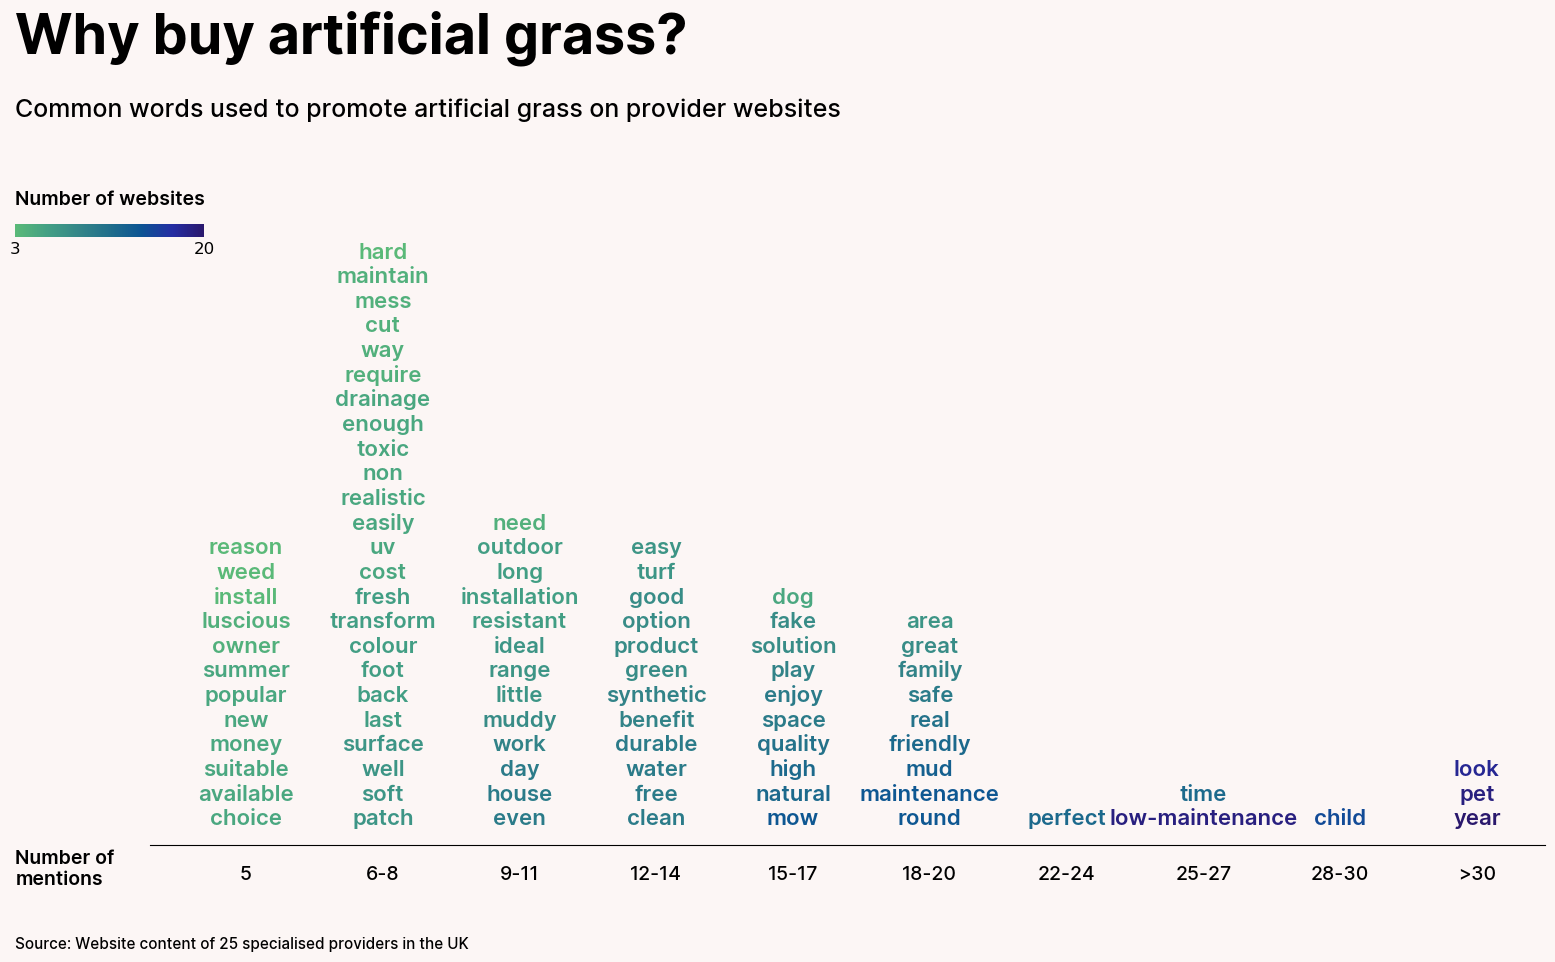

In [547]:
# Distribution chart
fig, ax = plt.subplots(figsize=(18, 8))
fig.set_facecolor('#fcf6f5')

# ====
# loop through words and position them based on binning and number of providers
x = 1
for _bin in histo["binned"].unique():
    y=0.8
    for word in histo[histo["binned"]==_bin]["Word"]:
        colour = m.to_rgba(histo[(histo["binned"]==_bin) & (histo["Word"]==word)]["Provider_count"])
        ax.text(x,y, word, ha="center", color=colour, fontweight="bold", fontsize=16, font=subtitle_font)                       
        y+=1
    x+=1

# ====
#configure axes
ax.set_ylim(0,25)
ax.set_xlim(0.3,10.5)
ax.set_yticks([])
ax.tick_params(axis='x', length = 0,color= '#f9f9f9',  pad=15)
ax.set_xticks(np.arange(1,11,1), list(histo["binned"].unique()), va="top", font=label_font, fontsize=14)
plt.figtext(0.05, 0.06, "Number of\nmentions", fontproperties= subtitle_font, fontsize=14,  ha="left", clip_on=False)

for pos in ["top", "left", "right"]:
    ax.spines[pos].set_visible(False)

ax.set_facecolor('#fcf6f5')

#======
#colorbar
cbaxes = fig.add_axes([0.05, 0.87, 0.105, 0.016]) #axes to hold colorbar                   
cb = plt.colorbar(m, cax = cbaxes, anchor=(1,1.2), orientation='horizontal', drawedges=False,
            ticks=[3,  20])
cb.outline.set_linewidth(0)
cb.ax.tick_params(labelsize=12) 
cbaxes.tick_params(size=0)
cbaxes.text(3,2.5, "Number of websites", fontsize=14, font=subtitle_font)


# ====
# Title and footnotes
plt.figtext(0.05, 1.1, "Why buy artificial grass?", fontproperties= title_font, fontsize=40,  ha="left")
plt.figtext(0.05, 1.02, "Common words used to promote artificial grass on provider websites",
            linespacing=1.7,fontproperties=label_font, fontsize=18, ha="left", )
plt.figtext(0.05, -0.02, "Source: Website content of 25 specialised providers in the UK",
            fontproperties= label_font, fontsize=11,  ha="left")

#export
plt.savefig("word-frequency-distribution.png", bbox_inches='tight', pad_inches=1, facecolor='#fcf6f5', dpi=300)
plt.savefig("word-frequency-distribution.svg", bbox_inches='tight', transparent=True, dpi=300)

plt.show()

## Names

Work in Progress - visualising names for artifical grass

In [97]:
all_names = []

for list in df["names"].str.split(", ").dropna():
    all_names += list

all_names = pd.DataFrame(all_names).rename(columns={0:"name"})
all_names = all_names.value_counts().reset_index().rename(columns={0:"count"})

all_names.to_csv("names_to_group.csv", index=False)

In [96]:
all_names = pd.read_csv("names_grouped.csv")
all_names

,name,count,theme
0,Abinger,1,place
1,Absolute play,1,play
2,Active,1,play
3,Adelaide,1,place
4,Adventure,1,play
...,...,...,...
338,Wonder,1,quality
339,Wonder Yarn,1,quality
340,Woodhouse,1,nature
341,Woodstock,1,place


In [ ]:
import circlify

In [12]:
data = [
        0.05, {'id': 'a2', 'datum': 0.05},
        {'id': 'a0', 'datum': 0.8, 'children': [0.3, 0.2, 0.2, 0.1], },
        {'id': 'a1', 'datum': 0.1, 'children': [
            {'id': 'a1_1', 'datum': 0.05}, {'datum': 0.04}, 0.01],
        },
    ]
circles = circlify.circlify(data, show_enclosure=True)

In [39]:
from pprint import pprint as pp
data = [
        {'id': 'Group 1', 'datum': 5, 'children': [1,4],},
        {'id': 'Group 2', 'datum': 6, 'children': [3, 1, 1, 1], },
    
        {'id': 'Group 3', 'datum': 2, 'children': [
        {'id': 'a1_1', 'datum':1}, {'datum': 1}],
        },
    ]
circles = circlify.circlify(data, show_enclosure=False)
pp(circles)

[Circle(x=-0.059296583916799324, y=0.6261840473045781, r=0.3018239549693753, level=1, ex={'id': 'Group 3', 'datum': 2, 'children': [{'id': 'a1_1', 'datum': 1}, {'datum': 1}]}),
 Circle(x=-0.5227744249483388, y=0.0, r=0.4772255750516612, level=1, ex={'id': 'Group 1', 'datum': 5, 'children': [1, 4]}),
 Circle(x=0.4772255750516612, y=0.0, r=0.5227744249483388, level=1, ex={'id': 'Group 2', 'datum': 6, 'children': [3, 1, 1, 1]}),
 Circle(x=0.09161539356788834, y=0.6261840473045781, r=0.15091197748468765, level=2, ex={'id': 'a1_1', 'datum': 1}),
 Circle(x=-0.21020856140148697, y=0.6261840473045781, r=0.15091197748468765, level=2, ex={'datum': 1}),
 Circle(x=-0.8409248083161129, y=0.0, r=0.15907519168388706, level=2, ex={'datum': 1}),
 Circle(x=0.16289044841366307, y=-0.15052251620919585, r=0.1742581416494462, level=2, ex={'datum': 1}),
 Circle(x=0.29045626173359185, y=0.17380843050495778, r=0.1742581416494462, level=2, ex={'datum': 1}),
 Circle(x=0.6047913883715904, y=0.32433094671415325, r

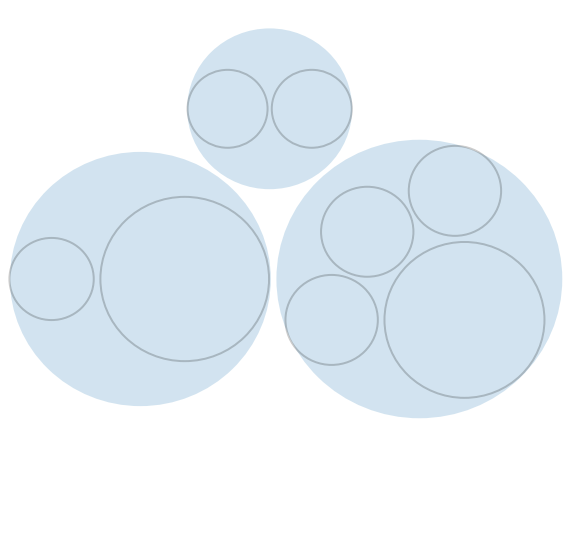

In [48]:

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# plot circles
for circle in circles:
    x, y, r = circle
    if circle.level == 1:
        ax.add_patch(plt.Circle((x, y), r*0.98, alpha=0.2, linewidth=0, fill=True))
    else:
        ax.add_patch(plt.Circle((x, y), r*0.95, alpha=0.2, linewidth=2, fill=False))